In [118]:
import random
import pandas as pd
from datetime import datetime
from pdfreader import SimplePDFViewer
import requests
import matplotlib.pyplot as plt
wGTID = 903653732
random.seed(a=wGTID)
print(random.randint(1,100))

21


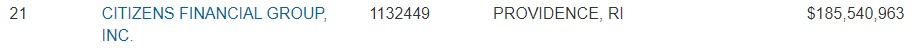

# CITIZENS FINANCIAL GROUP, INC
### Commercial & Consumer Banking
#### - Their primary business unit is for consumer and commercial banking and it operates in 11 states with over 1000 branches. Their largest assets classes as of 6/30/2021 were in real estate loans, commercial loans, and loans to individuals. With each making up 28.7%, 20.8% and 16% of their total assets respectively. 
### Citizens Securities, LLC
#### - This business unit handles the investing arm of the bank, it is devoted to consumers planning for retirement, education plans and personal portfolios. They offer a number of products such as IRAs, Fixed annuities, 529 College Savings Plans, Stocks Bonds, ETFs and Mutual Funds. In their latest NE1 you can see the percentage of orders they direct to venues for trading. Citadel Securities and Virtu Americas fulfill almost 90% of their orders for securities traded on NYSE or NASDAQ exchanges. 

# Section 4
1. earnings
2. net interest margins
3. non-interest or fee income
4. revenues, expenses
5. loan mix
6. past due and losses
7. losses and loan reserves
8. liquidity and funding
9. capitalization ratios
10. growth rates
11. asset composition
12. liability composition
13. liquidity and funding (important)
14. maturity gap
15. interest rate sensitivity
16. what is the major source of the bank performance?
17. how did the bank perform compared to the peers?

In [239]:
def peergrouplisttransform(samplelist):
    for i in range(len(samplelist)):
        samplelist[i] = "PG RATIO: " + samplelist[i]
    return samplelist

In [81]:
#for date in daterange:
dt = '20201231'
urlstr = 'https://www.ffiec.gov/npw/FinancialReport/ReturnFinancialReportCSV?rpt=BHCPR&id=1132449&dt=' + dt
req = requests.get(urlstr)
urlcontent = req.content
filename = dt + 'downloaded.csv'
csv_file = open(filename, 'wb')
csv_file.write(urlcontent)
csv_file.close()

## EARNINGS RATIOS

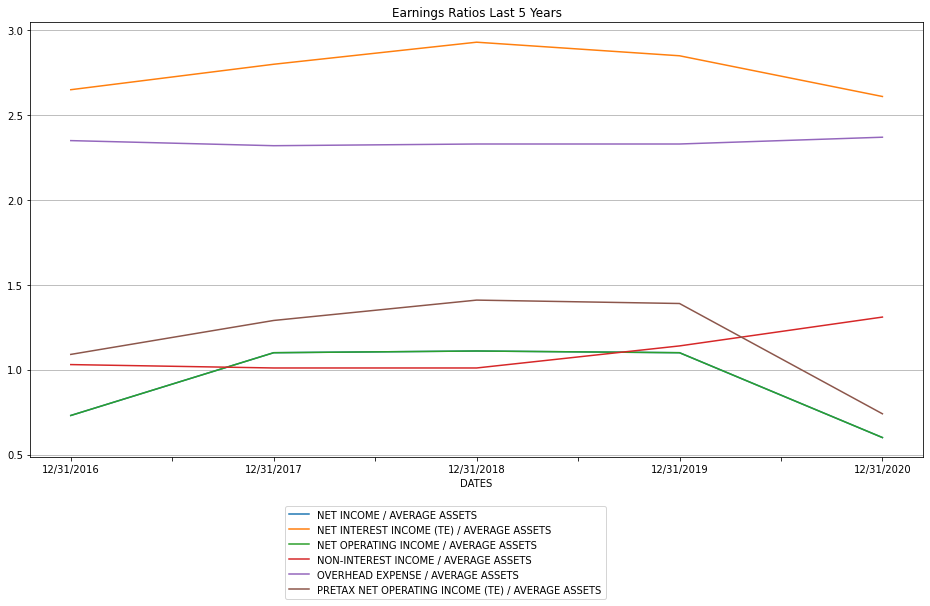

In [142]:
earningsratiolist = ['NET INTEREST INCOME (TE) / AVERAGE ASSETS', 'NON-INTEREST INCOME / AVERAGE ASSETS', 'OVERHEAD EXPENSE / AVERAGE ASSETS',
                       'PRETAX NET OPERATING INCOME (TE) / AVERAGE ASSETS', 'NET OPERATING INCOME / AVERAGE ASSETS', 'NET INCOME / AVERAGE ASSETS']
daterange2 = ['12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df = df[(df['Value'] <= 100) & (df['Value'] != 0) & (df['Value'] >= -100)]
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(earningsratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Earnings Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Net Interest Margins

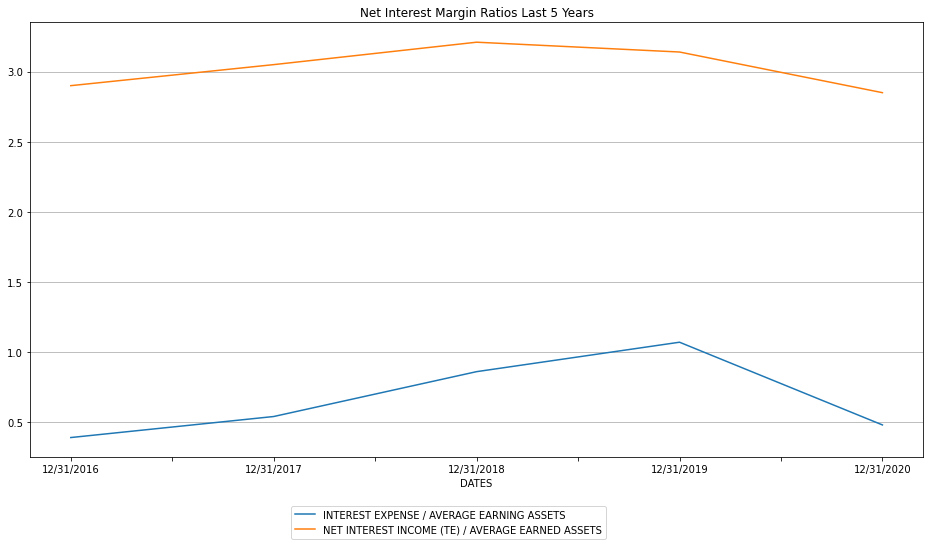

In [216]:
netintmarginratiolist = ['NET INTEREST INCOME (TE) / AVERAGE EARNED ASSETS', 'INTEREST EXPENSE / AVERAGE EARNING ASSETS']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df = df[(df['Value'] <= 100) & (df['Value'] != 0) & (df['Value'] >= -100)]
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(netintmarginratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Net Interest Margin Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Non-Interest or Fee Income

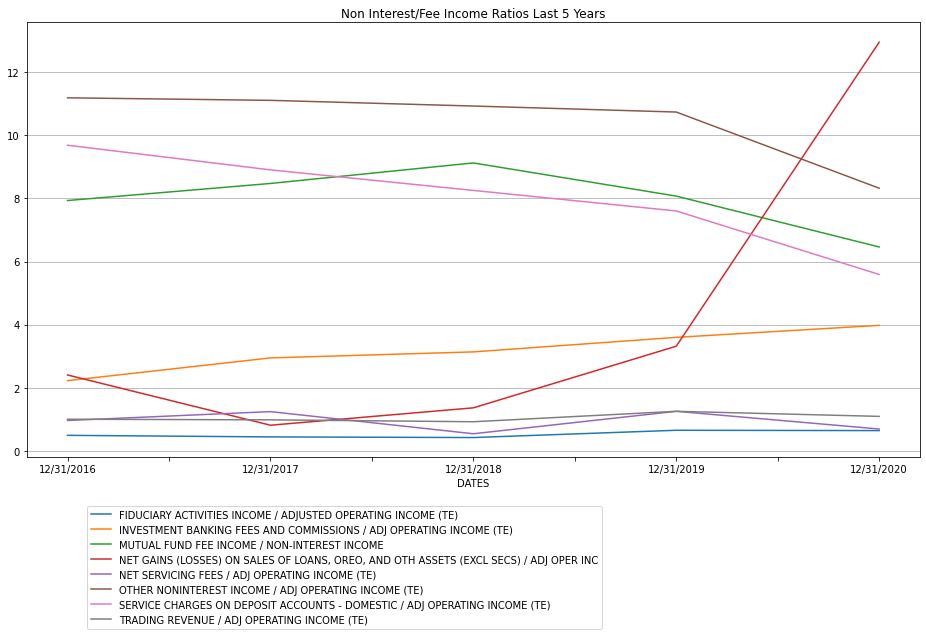

In [144]:
feeincomeratiolist = ['MUTUAL FUND FEE INCOME / NON-INTEREST INCOME', 'INVESTMENT BANKING FEES AND COMMISSIONS / ADJ OPERATING INCOME (TE)',
                        'FIDUCIARY ACTIVITIES INCOME / ADJUSTED OPERATING INCOME (TE)','SERVICE CHARGES ON DEPOSIT ACCOUNTS - DOMESTIC / ADJ OPERATING INCOME (TE)',
                         'TRADING REVENUE / ADJ OPERATING INCOME (TE)','VENTURE CAPITAL REVENUE / ADJUSTED OPERATING INCOME (TE)','NET SERVICING FEES / ADJ OPERATING INCOME (TE)',
                       'NET SECURITIZATION INCOME / ADJ OPERATING INCOME (TE)', 'NET GAINS (LOSSES) ON SALES OF LOANS, OREO, AND OTH ASSETS (EXCL SECS) / ADJ OPER INC', 
                        'OTHER NONINTEREST INCOME / ADJ OPERATING INCOME (TE)']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df = df[(df['Value'] <= 100) & (df['Value'] != 0) & (df['Value'] >= -100)]
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(feeincomeratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Non Interest/Fee Income Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Revenues and Expenses

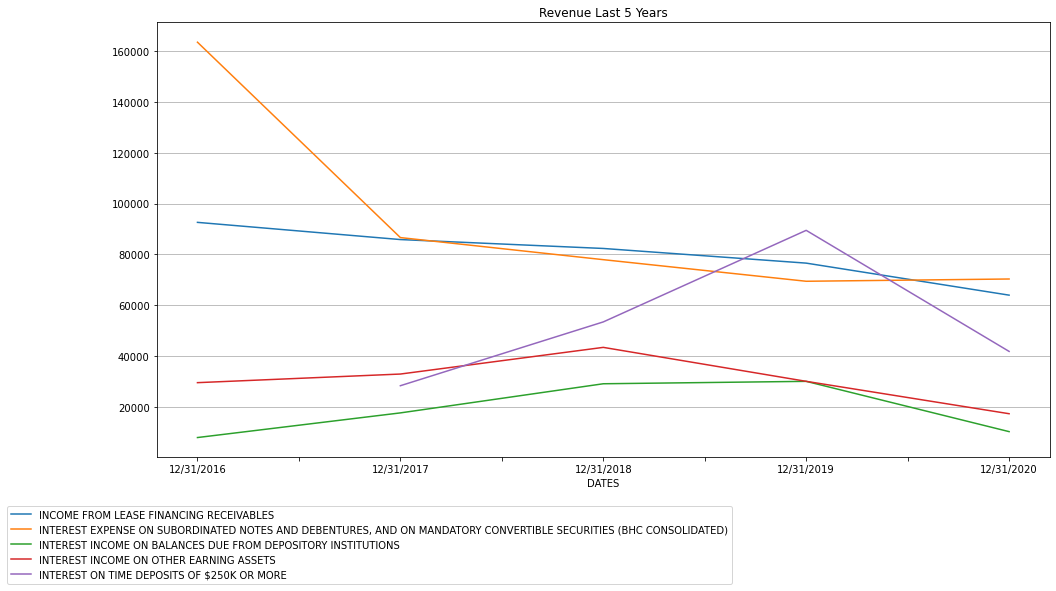

In [212]:
revenuelist = ['INTEREST INCOME ON BALANCES DUE FROM DEPOSITORY INSTITUTIONS','INTEREST ON TIME DEPOSITS OF $250K OR MORE',
                'INCOME FROM LEASE FINANCING RECEIVABLES', 'INTEREST EXPENSE ON SUBORDINATED NOTES AND DEBENTURES, AND ON MANDATORY CONVERTIBLE SECURITIES (BHC CONSOLIDATED)',
               'INTEREST INCOME ON OTHER EARNING ASSETS']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(revenuelist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Revenues Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

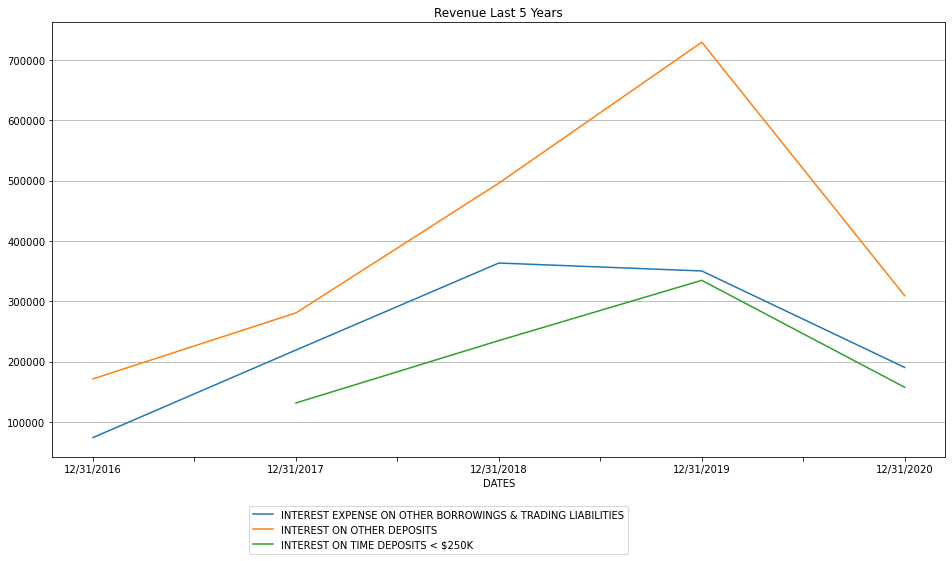

In [213]:
revenue2list = ['INTEREST ON TIME DEPOSITS < $250K', 'INTEREST ON OTHER DEPOSITS',
                'INTEREST EXPENSE ON OTHER BORROWINGS & TRADING LIABILITIES']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(revenue2list)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Revenues Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

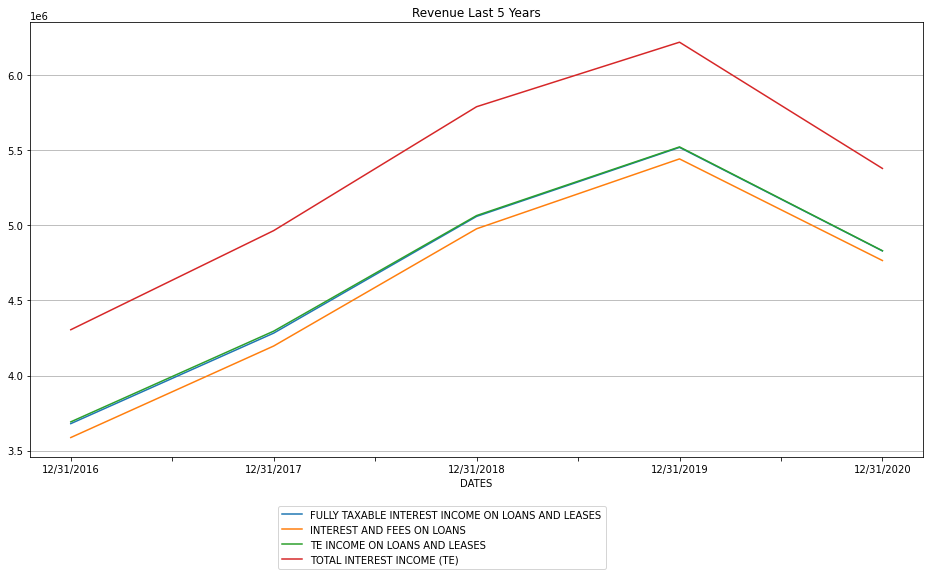

In [211]:
revenue3list = ['INTEREST AND FEES ON LOANS','FULLY TAXABLE INTEREST INCOME ON LOANS AND LEASES','TE INCOME ON LOANS AND LEASES', 'TOTAL INTEREST INCOME (TE)']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(revenue3list)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Revenues Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

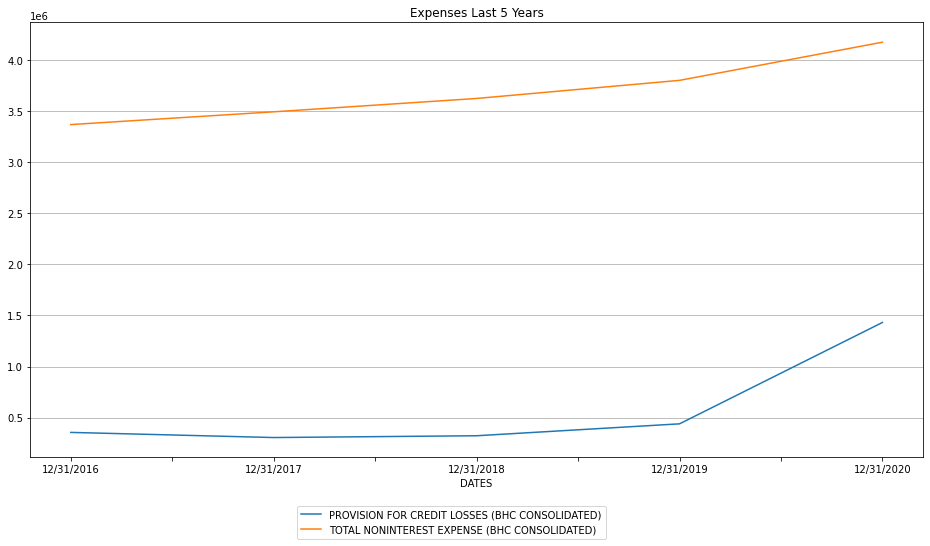

In [214]:
expenselist = ['TOTAL NONINTEREST EXPENSE (BHC CONSOLIDATED)','PROVISION FOR CREDIT LOSSES (BHC CONSOLIDATED)']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(expenselist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Expenses Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

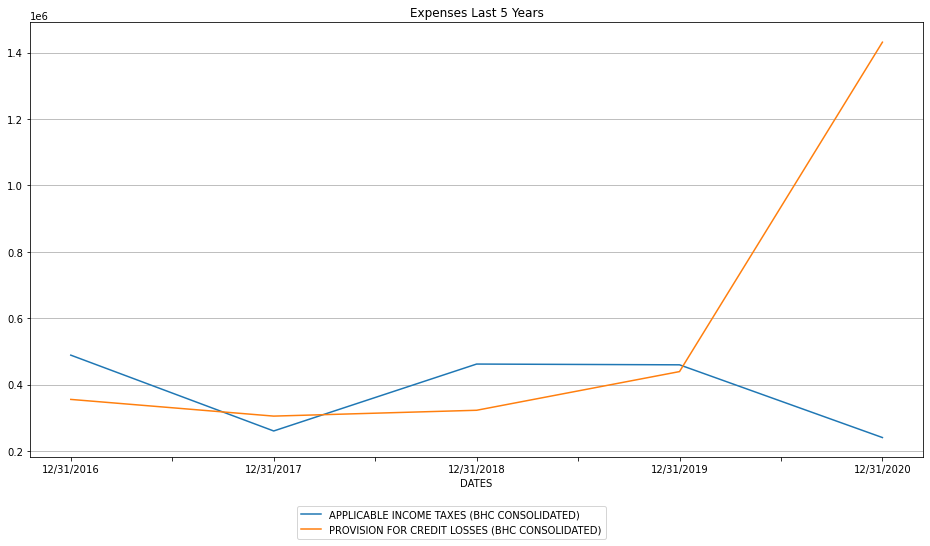

In [215]:
expense2list = ['APPLICABLE INCOME TAXES (BHC CONSOLIDATED)','PROVISION FOR CREDIT LOSSES (BHC CONSOLIDATED)']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(expense2list)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Expenses Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Loan Mix

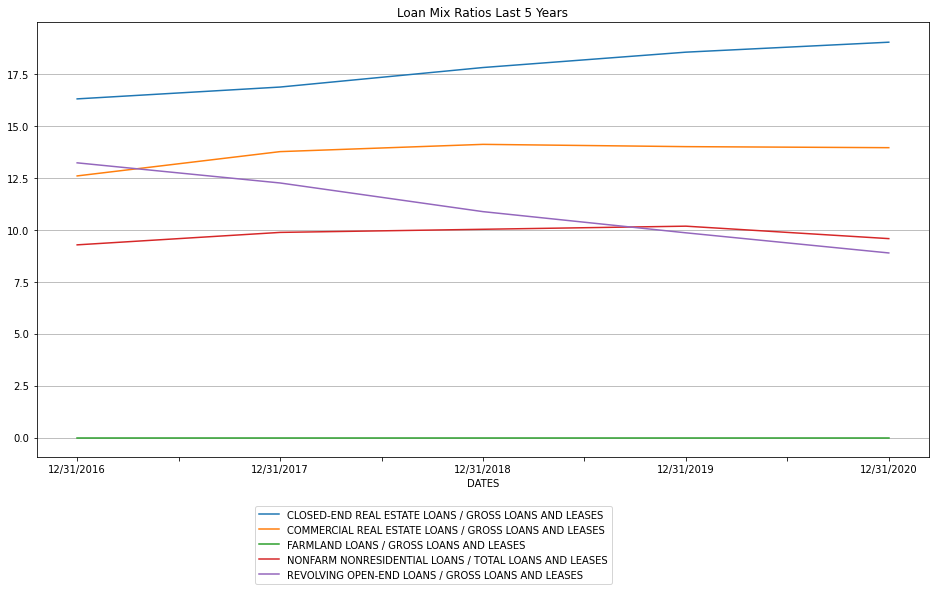

In [223]:
loanmixratiolist = ['REVOLVING OPEN-END LOANS / GROSS LOANS AND LEASES','CLOSED-END REAL ESTATE LOANS / GROSS LOANS AND LEASES',
                    'COMMERCIAL REAL ESTATE LOANS / GROSS LOANS AND LEASES','NONFARM NONRESIDENTIAL LOANS / TOTAL LOANS AND LEASES', 
                    'FARMLAND LOANS / GROSS LOANS AND LEASES']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(loanmixratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Loan Mix Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

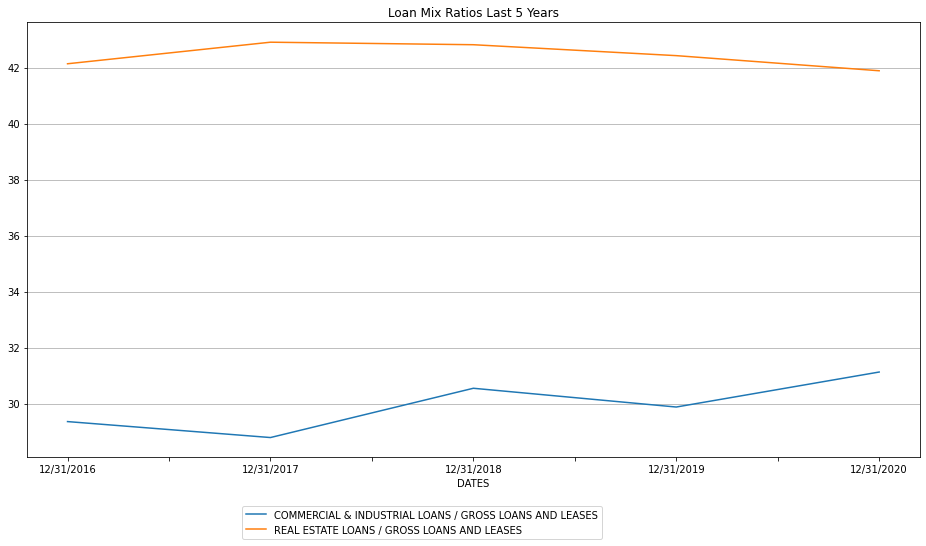

In [148]:
loanmix2ratiolist = ['COMMERCIAL & INDUSTRIAL LOANS / GROSS LOANS AND LEASES','REAL ESTATE LOANS / GROSS LOANS AND LEASES']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(loanmix2ratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Loan Mix Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

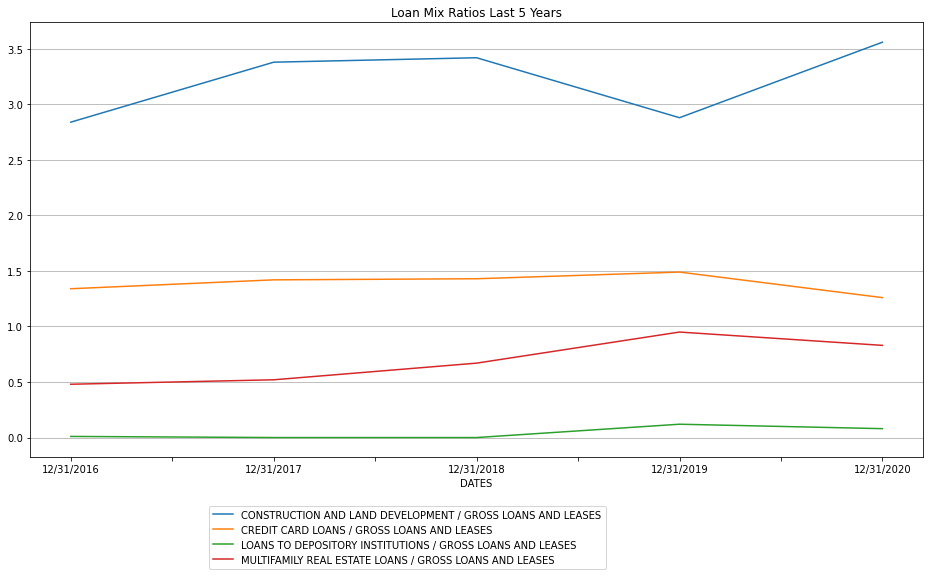

In [222]:
loanmix3ratiolist = ['CONSTRUCTION AND LAND DEVELOPMENT / GROSS LOANS AND LEASES', 'CREDIT CARD LOANS / GROSS LOANS AND LEASES',
'MULTIFAMILY REAL ESTATE LOANS / GROSS LOANS AND LEASES','LOANS TO DEPOSITORY INSTITUTIONS / GROSS LOANS AND LEASES']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(loanmix3ratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Loan Mix Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Past Due & Losses

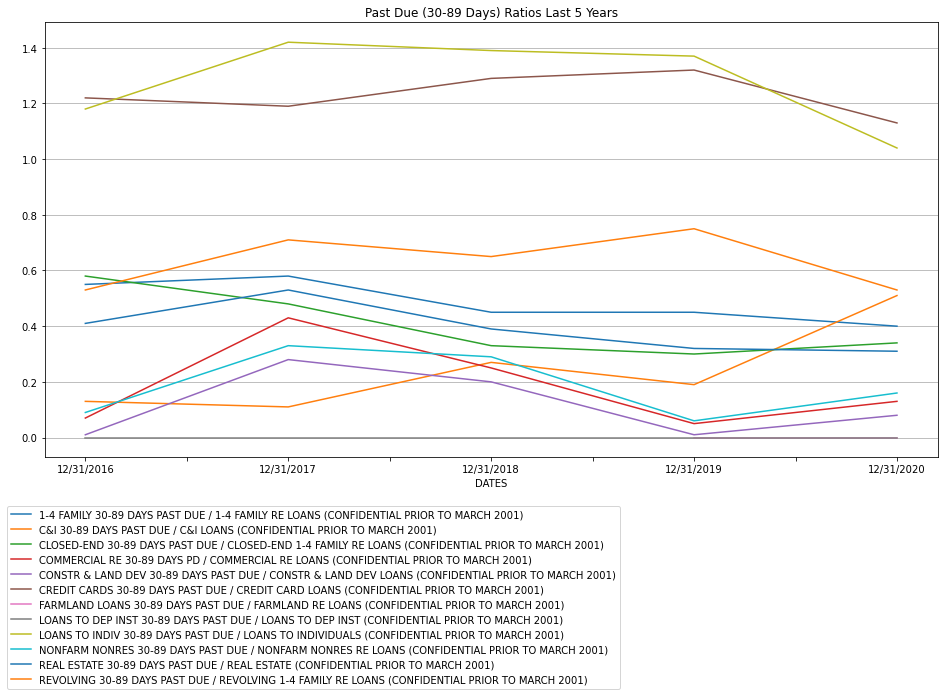

In [221]:
pastdue30ratiolist = ['REAL ESTATE 30-89 DAYS PAST DUE / REAL ESTATE (CONFIDENTIAL PRIOR TO MARCH 2001)', 'LOANS TO INDIV 30-89 DAYS PAST DUE / LOANS TO INDIVIDUALS (CONFIDENTIAL PRIOR TO MARCH 2001)',
'LOANS TO DEP INST 30-89 DAYS PAST DUE / LOANS TO DEP INST (CONFIDENTIAL PRIOR TO MARCH 2001)','OTHER LOANS & LEASES 30-89 DAYS PAST DUE / OTHER LOANS & LEASES (CONFIDENTIAL PRIOR TO MARCH 2001',
                    '1-4 FAMILY 30-89 DAYS PAST DUE / 1-4 FAMILY RE LOANS (CONFIDENTIAL PRIOR TO MARCH 2001)','REVOLVING 30-89 DAYS PAST DUE / REVOLVING 1-4 FAMILY RE LOANS (CONFIDENTIAL PRIOR TO MARCH 2001)',
                    'CLOSED-END 30-89 DAYS PAST DUE / CLOSED-END 1-4 FAMILY RE LOANS (CONFIDENTIAL PRIOR TO MARCH 2001)','COMMERCIAL RE 30-89 DAYS PD / COMMERCIAL RE LOANS (CONFIDENTIAL PRIOR TO MARCH 2001)',
                    'CONSTR & LAND DEV 30-89 DAYS PAST DUE / CONSTR & LAND DEV LOANS (CONFIDENTIAL PRIOR TO MARCH 2001)',
                    'NONFARM NONRES 30-89 DAYS PAST DUE / NONFARM NONRES RE LOANS (CONFIDENTIAL PRIOR TO MARCH 2001)','FARMLAND LOANS 30-89 DAYS PAST DUE / FARMLAND RE LOANS (CONFIDENTIAL PRIOR TO MARCH 2001)',
                    'CREDIT CARDS 30-89 DAYS PAST DUE / CREDIT CARD LOANS (CONFIDENTIAL PRIOR TO MARCH 2001)','C&I 30-89 DAYS PAST DUE / C&I LOANS (CONFIDENTIAL PRIOR TO MARCH 2001)',
                    ]
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(pastdue30ratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Past Due (30-89 Days) Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

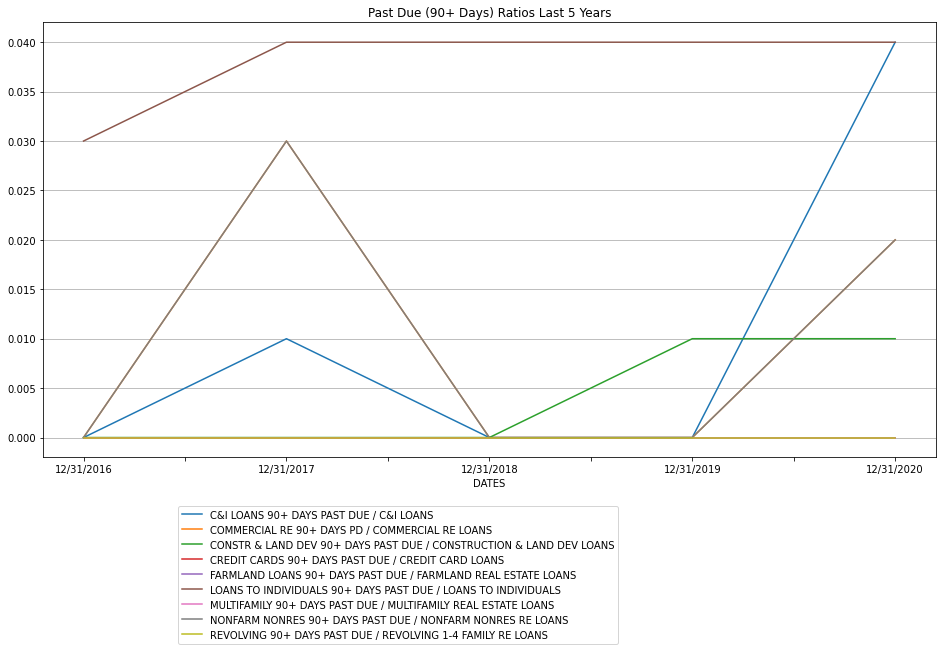

In [220]:
##Information not very valuable limited data and small values
pastdue90ratiolist = [ 'C&I LOANS 90+ DAYS PAST DUE / C&I LOANS','NONFARM NONRES 90+ DAYS PAST DUE / NONFARM NONRES RE LOANS',
                    'LOANS TO INDIVIDUALS 90+ DAYS PAST DUE / LOANS TO INDIVIDUALS','REVOLVING 90+ DAYS PAST DUE / REVOLVING 1-4 FAMILY RE LOANS',
                    'COMMERCIAL RE 90+ DAYS PD / COMMERCIAL RE LOANS','CONSTR & LAND DEV 90+ DAYS PAST DUE / CONSTRUCTION & LAND DEV LOANS',
                    'MULTIFAMILY 90+ DAYS PAST DUE / MULTIFAMILY REAL ESTATE LOANS', 'NONFARM NONRES 90+ DAYS PAST DUE / NONFARM NONRES RE LOANS',
                      'FARMLAND LOANS 90+ DAYS PAST DUE / FARMLAND REAL ESTATE LOANS','CREDIT CARDS 90+ DAYS PAST DUE / CREDIT CARD LOANS'
                    ]
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(pastdue90ratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Past Due (90+ Days) Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

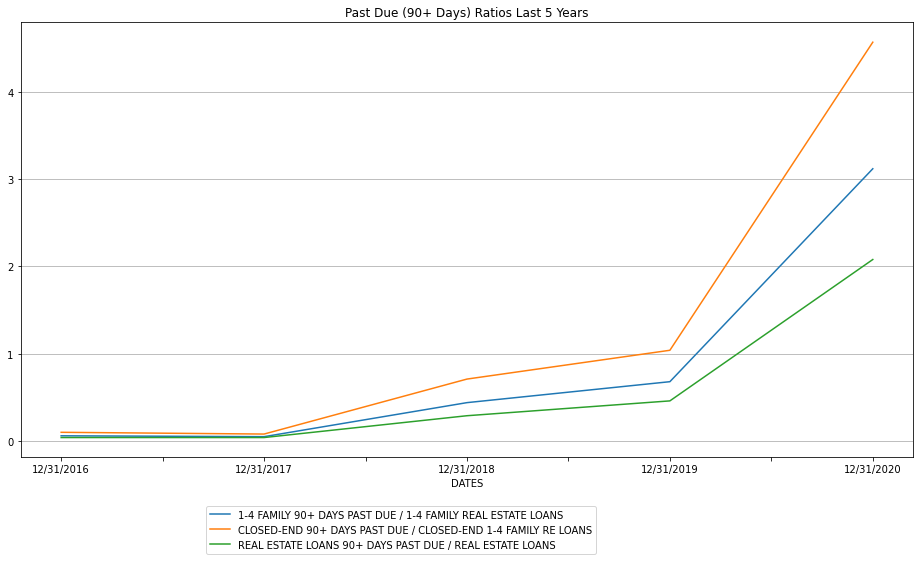

In [156]:
secondpastdue90ratiolist = ['REAL ESTATE LOANS 90+ DAYS PAST DUE / REAL ESTATE LOANS',
                      '1-4 FAMILY 90+ DAYS PAST DUE / 1-4 FAMILY REAL ESTATE LOANS',
                      'CLOSED-END 90+ DAYS PAST DUE / CLOSED-END 1-4 FAMILY RE LOANS']
daterange2 = ['12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(secondpastdue90ratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Past Due (90+ Days) Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

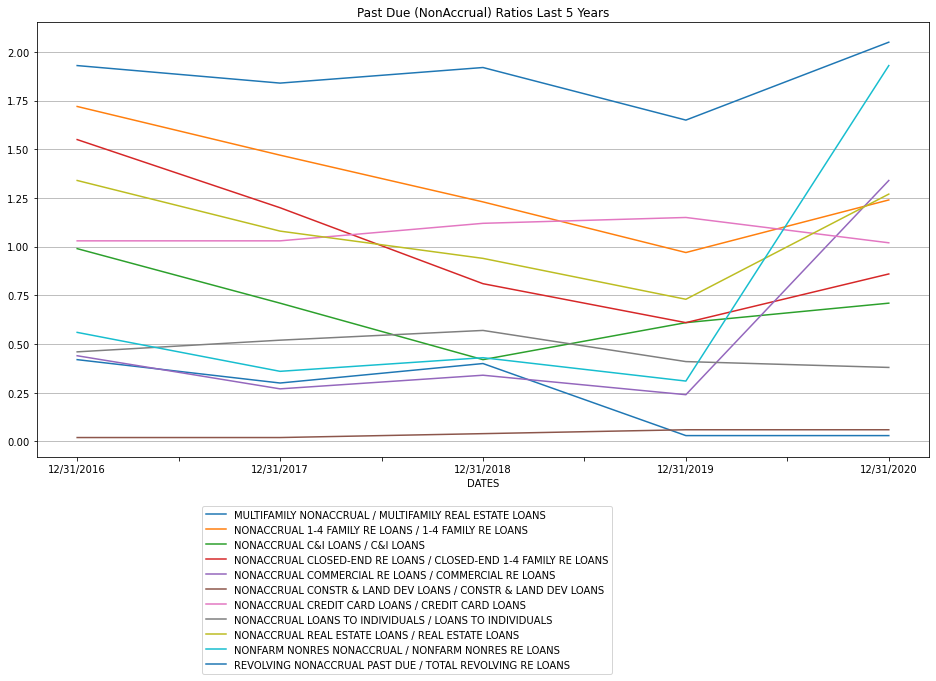

In [159]:
pastduenonaccrualratiolist = [ 'NONACCRUAL REAL ESTATE LOANS / REAL ESTATE LOANS',
                    'NONACCRUAL C&I LOANS / C&I LOANS','NONACCRUAL LOANS TO INDIVIDUALS / LOANS TO INDIVIDUALS',
                    'NONACCRUAL 1-4 FAMILY RE LOANS / 1-4 FAMILY RE LOANS','REVOLVING NONACCRUAL PAST DUE / TOTAL REVOLVING RE LOANS',
                    'NONACCRUAL CLOSED-END RE LOANS / CLOSED-END 1-4 FAMILY RE LOANS', 'NONACCRUAL COMMERCIAL RE LOANS / COMMERCIAL RE LOANS',
                    'NONACCRUAL CONSTR & LAND DEV LOANS / CONSTR & LAND DEV LOANS','MULTIFAMILY NONACCRUAL / MULTIFAMILY REAL ESTATE LOANS',
                    'NONFARM NONRES NONACCRUAL / NONFARM NONRES RE LOANS','FARMLAND NONACCRUAL / FARMLAND REAL ESTATE LOANS',
                               'NONACCRUAL CREDIT CARD LOANS / CREDIT CARD LOANS'
                    ]
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(pastduenonaccrualratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Past Due (NonAccrual) Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Losses and Loan Reserves

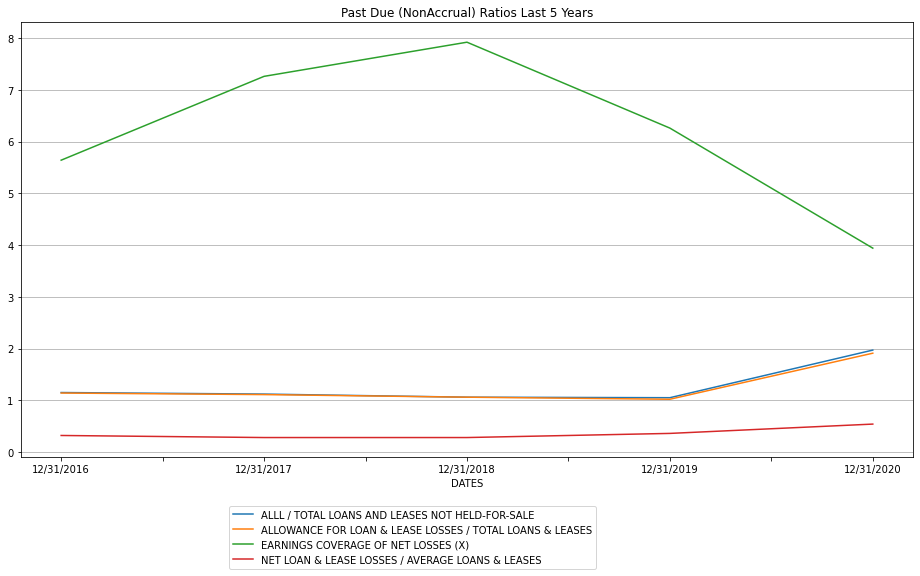

In [160]:
lossesandreservesratiolist = [ 'NET LOAN & LEASE LOSSES / AVERAGE LOANS & LEASES',
                    'ALLOWANCE FOR LOAN & LEASE LOSSES / TOTAL LOANS & LEASES','EARNINGS COVERAGE OF NET LOSSES (X)',
                    'ALLL / TOTAL LOANS AND LEASES NOT HELD-FOR-SALE']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(lossesandreservesratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Losses & Loan Reserves Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Liquidity and Funding

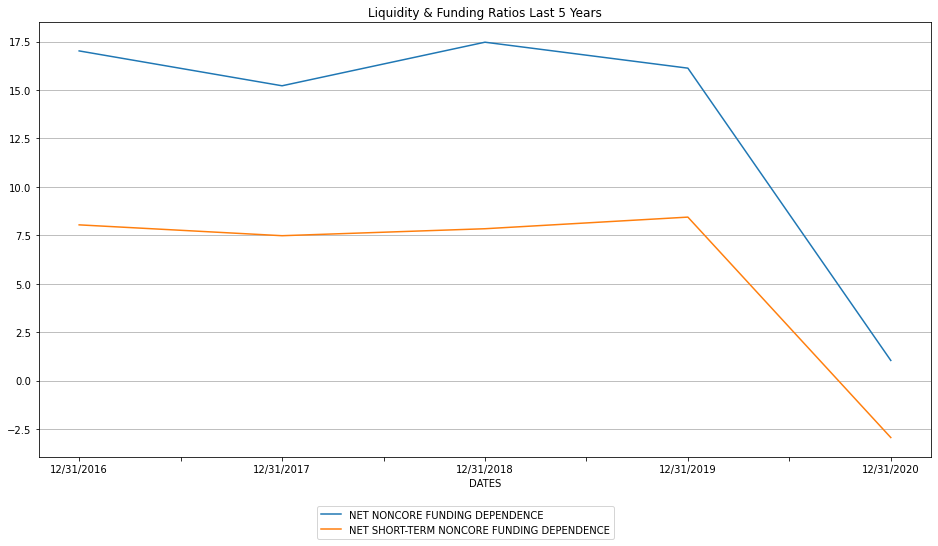

In [163]:
liqudityratiolist = [ 'NET NONCORE FUNDING DEPENDENCE',
                    'NET SHORT-TERM NONCORE FUNDING DEPENDENCE']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(liqudityratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Liquidity & Funding Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

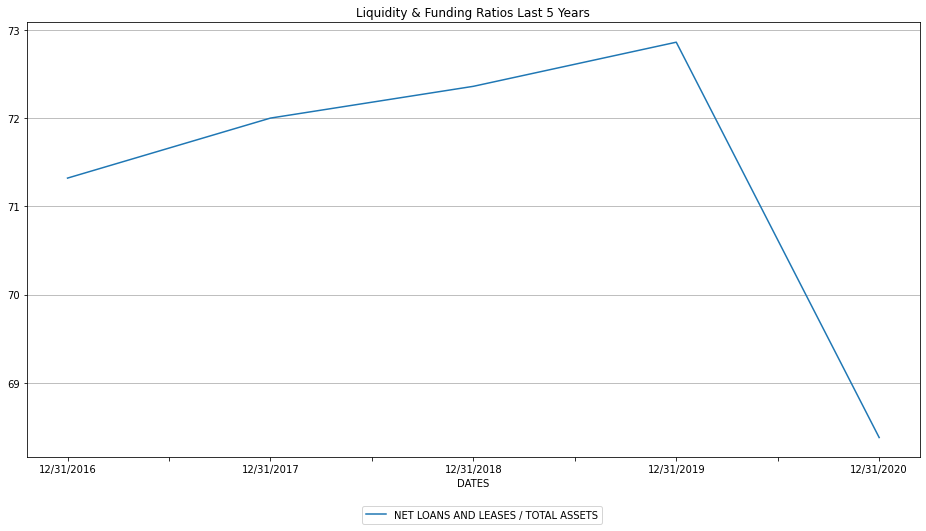

In [164]:
liqudity2ratiolist = [ 'NET LOANS AND LEASES / TOTAL ASSETS']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(liqudity2ratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Liquidity & Funding Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Capitalization Ratios

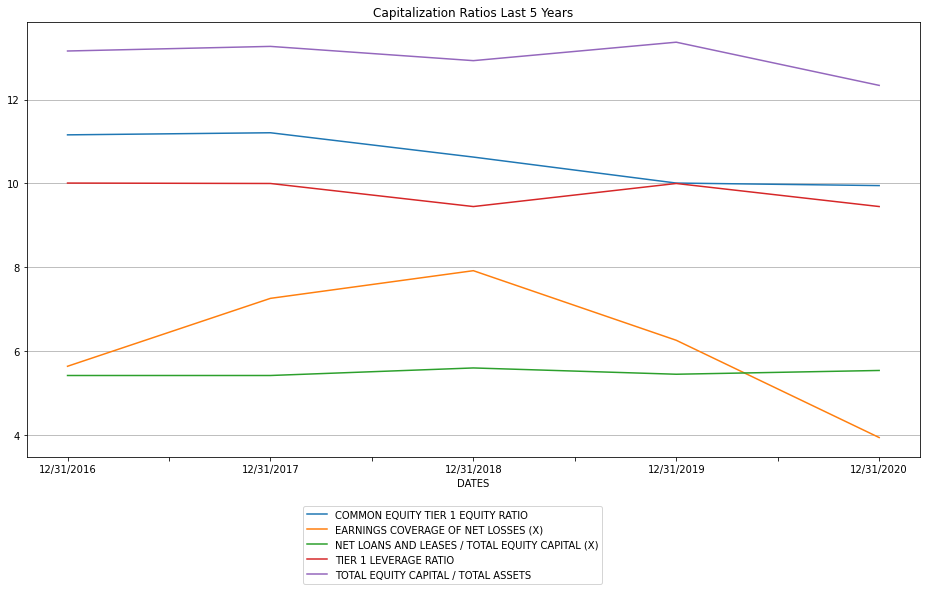

In [165]:
capitalratiolist = [ 'TIER 1 LEVERAGE RATIO',
                    'TOTAL EQUITY CAPITAL / TOTAL ASSETS','EARNINGS COVERAGE OF NET LOSSES (X)',
                    'COMMON EQUITY TIER 1 EQUITY RATIO', 'NET LOANS AND LEASES / TOTAL EQUITY CAPITAL (X)']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(capitalratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Capitalization Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

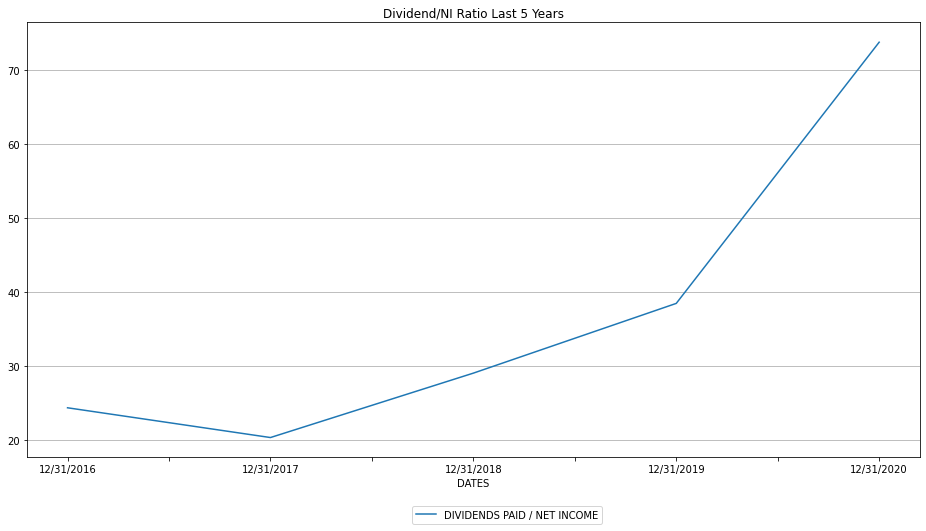

In [168]:
dividendsratiolist = [ 'DIVIDENDS PAID / NET INCOME']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(dividendsratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Dividend/NI Ratio Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Growth Rates

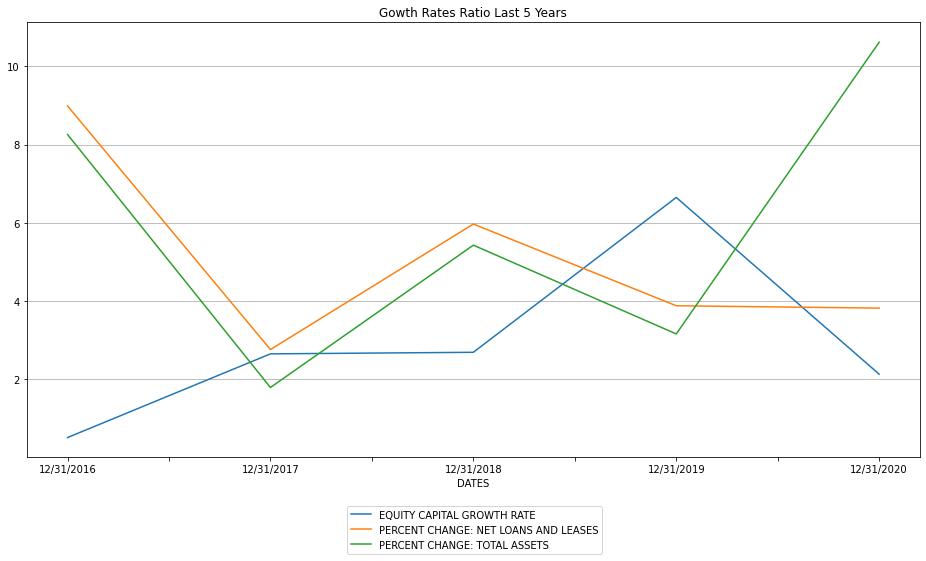

In [171]:
growthratesratiolist = [ 'PERCENT CHANGE: TOTAL ASSETS','EQUITY CAPITAL GROWTH RATE',
                        'PERCENT CHANGE: NET LOANS AND LEASES']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(growthratesratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Gowth Rates Ratio Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

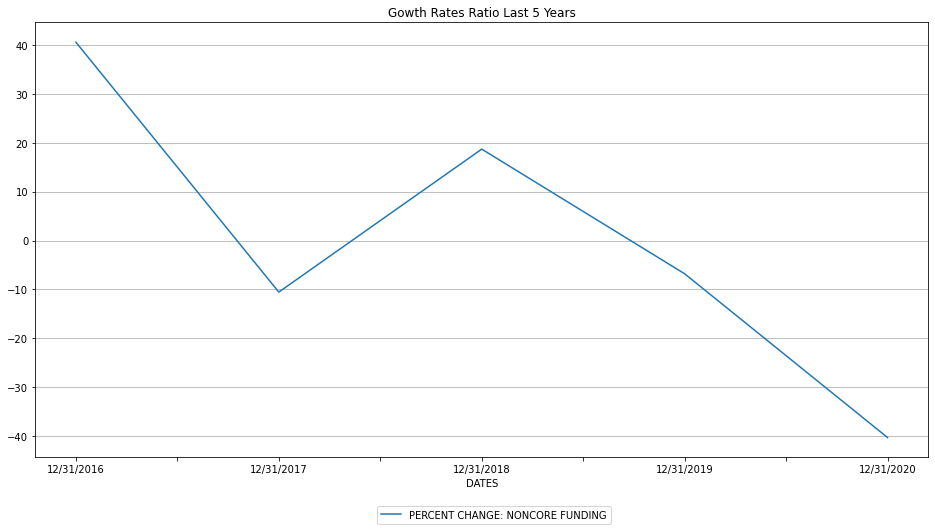

In [172]:
growthrates2ratiolist = ['PERCENT CHANGE: NONCORE FUNDING']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(growthrates2ratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Gowth Rates Ratio Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Asset Composition

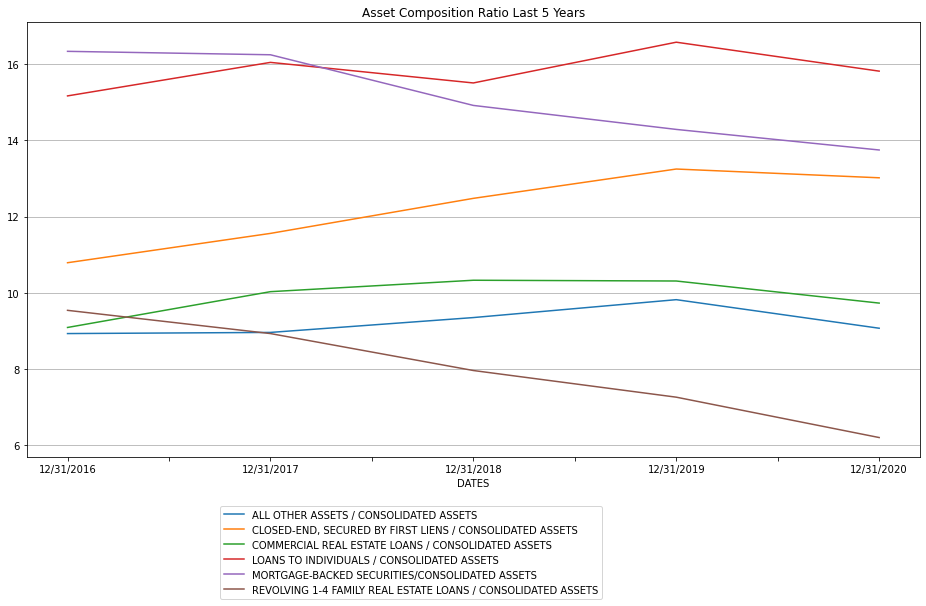

In [178]:
assetcompratiolist = [ 'LOANS TO INDIVIDUALS / CONSOLIDATED ASSETS', 'ALL OTHER ASSETS / CONSOLIDATED ASSETS',
                     'REVOLVING 1-4 FAMILY REAL ESTATE LOANS / CONSOLIDATED ASSETS','CLOSED-END, SECURED BY FIRST LIENS / CONSOLIDATED ASSETS',
                     'COMMERCIAL REAL ESTATE LOANS / CONSOLIDATED ASSETS',
                     'MORTGAGE-BACKED SECURITIES/CONSOLIDATED ASSETS']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(assetcompratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Asset Composition Ratio Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

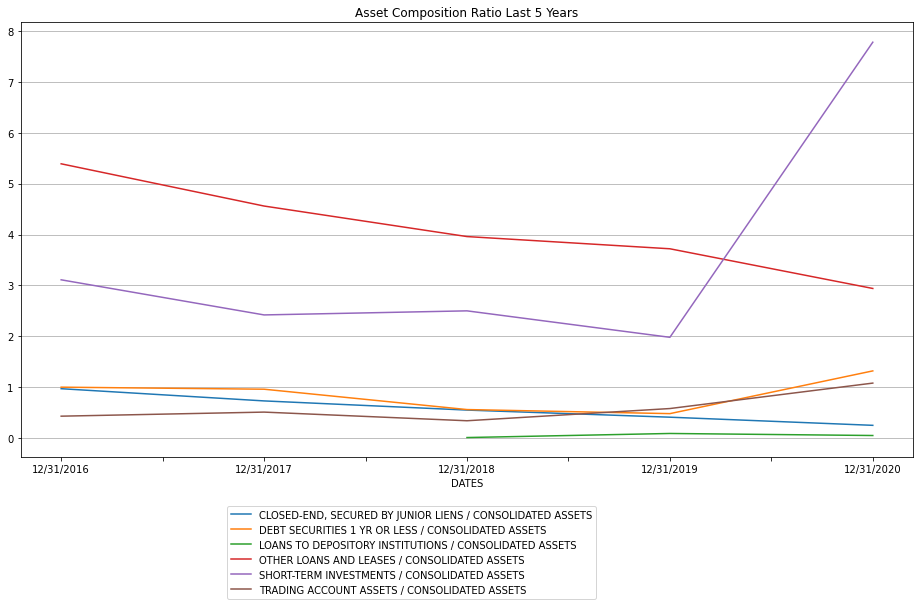

In [175]:
assetcomp2ratiolist = ['LOANS TO DEPOSITORY INSTITUTIONS / CONSOLIDATED ASSETS','TRADING ACCOUNT ASSETS / CONSOLIDATED ASSETS', 
'SHORT-TERM INVESTMENTS / CONSOLIDATED ASSETS', 'DEBT SECURITIES 1 YR OR LESS / CONSOLIDATED ASSETS', 'OTHER LOANS AND LEASES / CONSOLIDATED ASSETS',
'CLOSED-END, SECURED BY JUNIOR LIENS / CONSOLIDATED ASSETS']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(assetcomp2ratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Asset Composition Ratio Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')


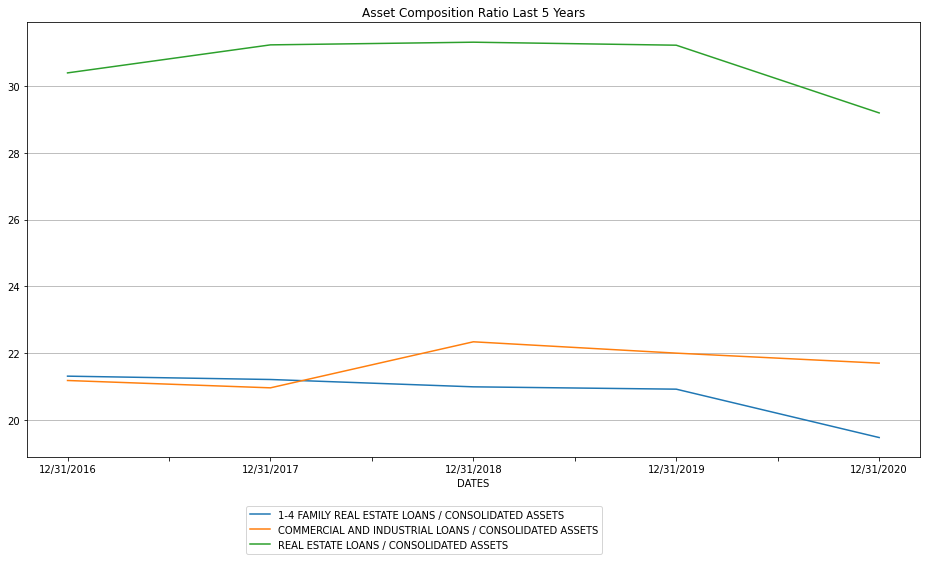

In [177]:
assetcomp3ratiolist = ['REAL ESTATE LOANS / CONSOLIDATED ASSETS',
                      'COMMERCIAL AND INDUSTRIAL LOANS / CONSOLIDATED ASSETS','1-4 FAMILY REAL ESTATE LOANS / CONSOLIDATED ASSETS']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(assetcomp3ratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Asset Composition Ratio Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')


## Liability Composition

Text(0.5, 1.0, '1-Yr % Change')

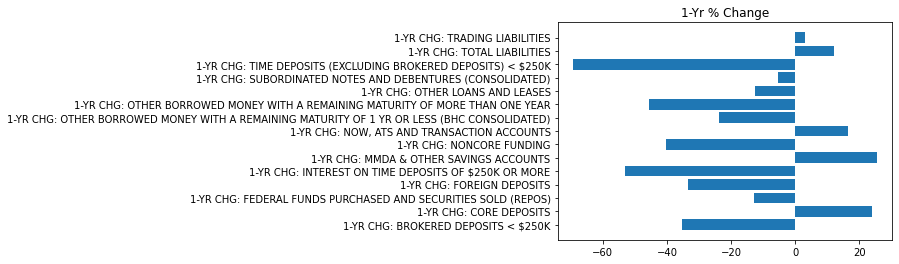

In [201]:
liabilitycompratiolist = ['1-YR CHG: DEMAND DEPOSITS (BHC CONSOL COMML BANKS)',
                      '1-YR CHG: NOW, ATS AND TRANSACTION ACCOUNTS','1-YR CHG: TIME DEPOSITS (EXCLUDING BROKERED DEPOSITS) < $250K',
                         '1-YR CHG: MMDA & OTHER SAVINGS ACCOUNTS','1-YR CHG: CORE DEPOSITS','1-YR CHG: INTEREST ON TIME DEPOSITS OF $250K OR MORE',
                         '1-YR CHG: FOREIGN DEPOSITS', '1-YR CHG: FEDERAL FUNDS PURCHASED AND SECURITIES SOLD (REPOS)','1-YR CHG: OTHER BORROWED MONEY WITH A REMAINING MATURITY OF 1 YR OR LESS (BHC CONSOLIDATED)',
                          '1-YR CHG: OTHER BORROWED MONEY WITH A REMAINING MATURITY OF MORE THAN ONE YEAR', '1-YR CHG: BROKERED DEPOSITS < $250K',
                          '1-YR CHG: NONCORE FUNDING', '1-YR CHG: TRADING LIABILITIES', '1-YR CHG: SUBORDINATED NOTES AND DEBENTURES (CONSOLIDATED)',
                          '1-YR CHG: OTHER LOANS AND LEASES','1-YR CHG: TOTAL LIABILITIES']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(liabilitycompratiolist)]
df = df[['Ratio Type','12/31/2020']]
df.head()
plt.barh(y = df['Ratio Type'], width = df['12/31/2020'])
plt.title('Liability Composition 1-Yr % Change')

Text(0.5, 1.0, 'Liability Composition 5-Yr % Change')

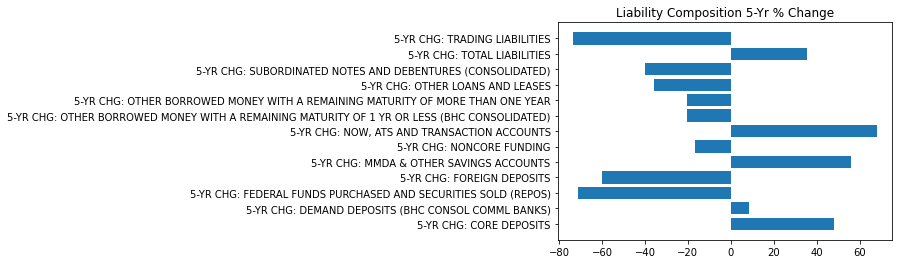

In [203]:
liabilitycompratiolist = ['5-YR CHG: DEMAND DEPOSITS (BHC CONSOL COMML BANKS)',
                      '5-YR CHG: NOW, ATS AND TRANSACTION ACCOUNTS','5-YR CHG: TIME DEPOSITS (EXCLUDING BROKERED DEPOSITS) < $250K',
                         '5-YR CHG: MMDA & OTHER SAVINGS ACCOUNTS','5-YR CHG: CORE DEPOSITS','5-YR CHG: INTEREST ON TIME DEPOSITS OF $250K OR MORE',
                         '5-YR CHG: FOREIGN DEPOSITS', '5-YR CHG: FEDERAL FUNDS PURCHASED AND SECURITIES SOLD (REPOS)','5-YR CHG: OTHER BORROWED MONEY WITH A REMAINING MATURITY OF 1 YR OR LESS (BHC CONSOLIDATED)',
                          '5-YR CHG: OTHER BORROWED MONEY WITH A REMAINING MATURITY OF MORE THAN ONE YEAR', '5-YR CHG: BROKERED DEPOSITS < $250K',
                          '5-YR CHG: NONCORE FUNDING', '5-YR CHG: TRADING LIABILITIES', '5-YR CHG: SUBORDINATED NOTES AND DEBENTURES (CONSOLIDATED)',
                          '5-YR CHG: OTHER LOANS AND LEASES','5-YR CHG: TOTAL LIABILITIES']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(liabilitycompratiolist)]
df = df[['Ratio Type','12/31/2020']]
df.head()
plt.barh(y = df['Ratio Type'], width = df['12/31/2020'])
plt.title('Liability Composition 5-Yr % Change')

## Maturity Gap

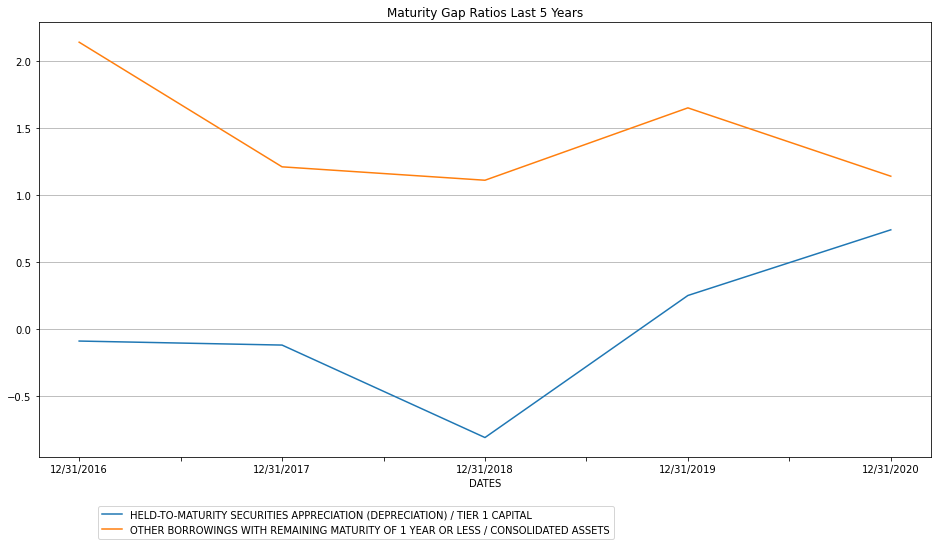

In [226]:
maturityratiolist = ['OTHER BORROWINGS WITH REMAINING MATURITY OF 1 YEAR OR LESS / CONSOLIDATED ASSETS',
                      'HELD-TO-MATURITY SECURITIES APPRECIATION (DEPRECIATION) / TIER 1 CAPITAL']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(maturityratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Maturity Gap Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

## Interest Rate Sensitivity

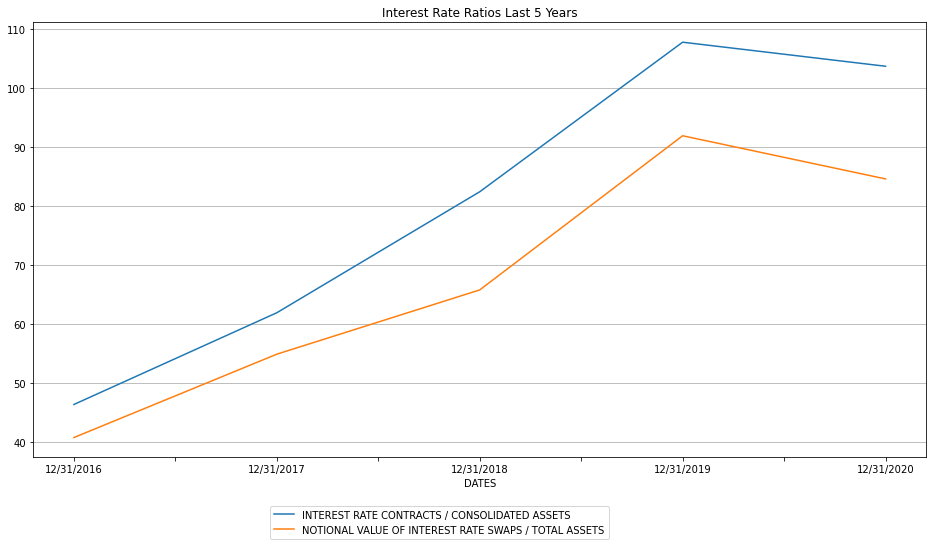

In [219]:
irratiolist = ['INTEREST RATE CONTRACTS / CONSOLIDATED ASSETS',
                'NOTIONAL VALUE OF INTEREST RATE SWAPS / TOTAL ASSETS']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(irratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Interest Rate Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

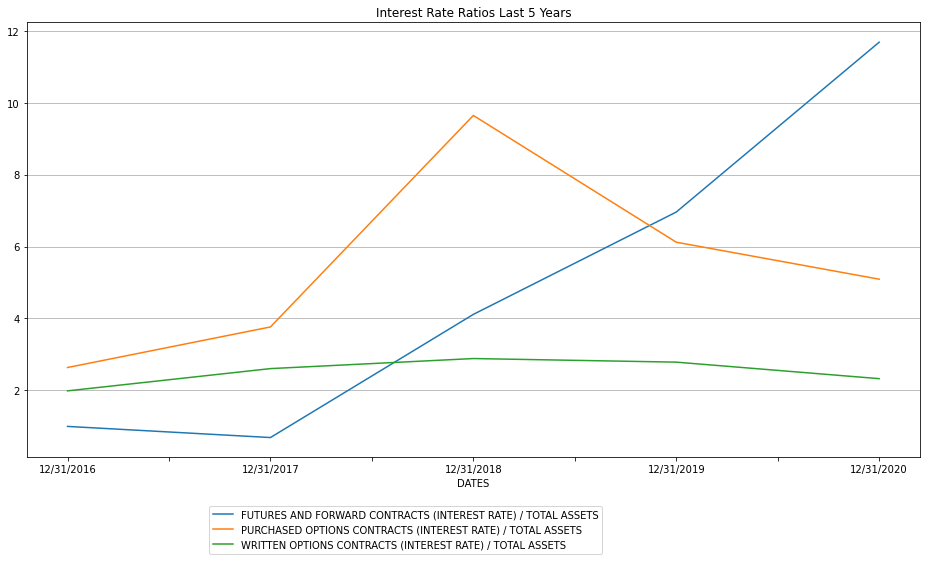

In [243]:
ir2ratiolist = ['FUTURES AND FORWARD CONTRACTS (INTEREST RATE) / TOTAL ASSETS', 'PURCHASED OPTIONS CONTRACTS (INTEREST RATE) / TOTAL ASSETS',
                      'WRITTEN OPTIONS CONTRACTS (INTEREST RATE) / TOTAL ASSETS']
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(ir2ratiolist)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Interest Rate Ratios Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')

['PG RATIO: FUTURES AND FORWARD CONTRACTS (INTEREST RATE) / TOTAL ASSETS', 'PG RATIO: PURCHASED OPTIONS CONTRACTS (INTEREST RATE) / TOTAL ASSETS', 'PG RATIO: WRITTEN OPTIONS CONTRACTS (INTEREST RATE) / TOTAL ASSETS']


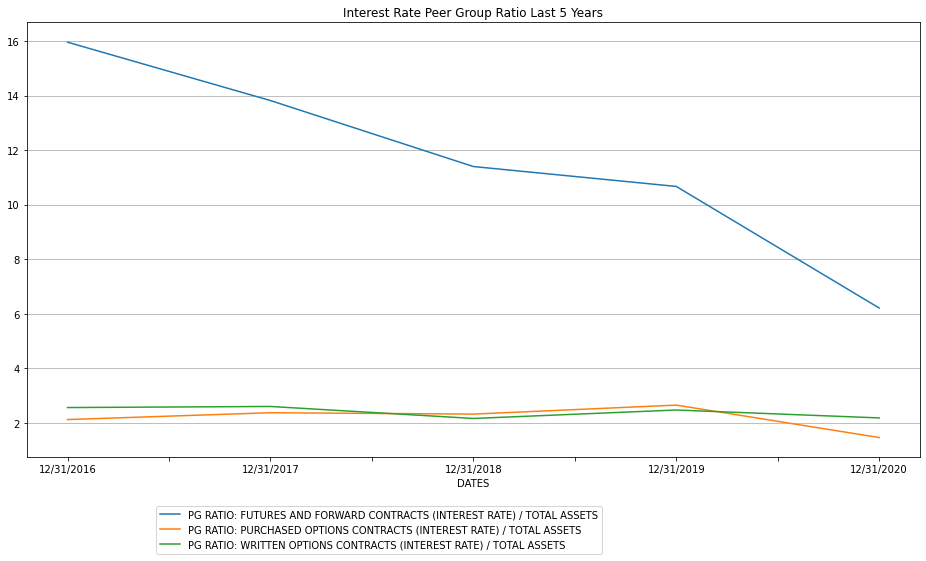

In [244]:
pgratiolistir = peergrouplisttransform(ir2ratiolist)
print(pgratiolistir)
testcase = dt + 'downloaded.csv'
df = pd.read_csv(testcase, header =None, skiprows=15)
df.rename(columns={0: 'ID', 1:'Ratio Type', 2: 'Value'}, inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')
df['COUNT'] = df.groupby(['Ratio Type']).cumcount()+1
df = df.set_index(['Ratio Type', 'COUNT'])['Value'].unstack().add_prefix('col').reset_index()
df.rename(columns={'COUNT': 'Index', 'col1': daterange2[0], 'col2':daterange2[1], 'col3': daterange2[2], 
                   'col4':daterange2[3], 'col5': daterange2[4]}, inplace=True)
df = df[df['Ratio Type'].isin(pgratiolistir)]
df = df[['Ratio Type','12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017', '12/31/2016']]
df.set_index('Ratio Type', inplace = True)
df = df.transpose()
df = df.sort_index(axis=0)
ax = df.plot(figsize=(16,8), title='Interest Rate Peer Group Ratio Last 5 Years')
ax.legend(bbox_to_anchor=(0.65,-0.1))
ax.set_xlabel('DATES')
ax.grid(axis='y', linestyle='-')